In [137]:
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

def date_parser(date):
    date = date.split(' ')[1]
    return pd.datetime.strptime(date, "%H:%M")

df = pd.read_csv("/home/tevin/dev/neu/bostonography/parsedlogfull.csv", sep=";", parse_dates=['DATE'], date_parser=date_parser)
df = df.set_index(pd.DatetimeIndex(df['DATE']))

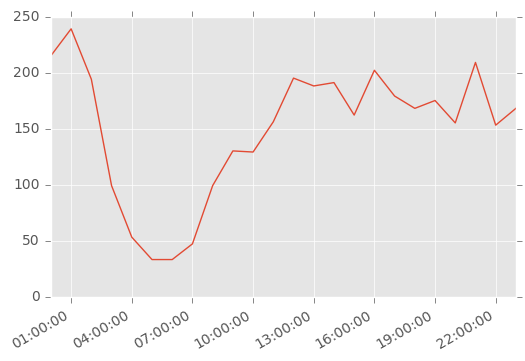

In [148]:
freq_hour = df.resample('H').count()
freq_hour
fig, ax = plt.subplots(1, 1)
ax.plot(freq_hour['DATE'])
ax.xaxis_date()
fig.autofmt_xdate()
fig

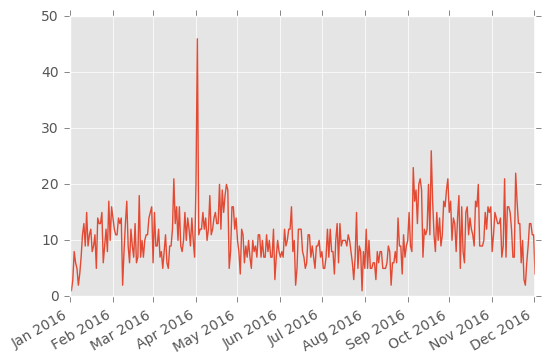

In [139]:
df2 = pd.read_csv("/home/tevin/dev/neu/bostonography/parsedlogfull.csv", sep=";",
                 parse_dates=['DATE'], 
                 date_parser= lambda x: pd.datetime.strptime(x, "%y-%m-%d %H:%M"))
df2 = df2.set_index(pd.DatetimeIndex(df2['DATE']))
freq_day = df2.resample('D').count()
fig, ax = plt.subplots(1, 1)
ax.plot(freq_day['DATE'])
ax.xaxis_date()
fig.autofmt_xdate()
fig

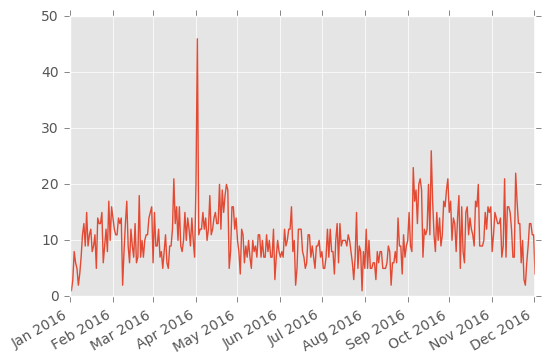

In [139]:
df2 = pd.read_csv("/home/tevin/dev/neu/bostonography/parsedlogfull.csv", sep=";",
                 parse_dates=['DATE'], 
                 date_parser= lambda x: pd.datetime.strptime(x, "%y-%m-%d %H:%M"))
df2 = df2.set_index(pd.DatetimeIndex(df2['DATE']))
freq_day = df2.resample('D').count()
fig, ax = plt.subplots(1, 1)
ax.plot(freq_day['DATE'])
ax.xaxis_date()
fig.autofmt_xdate()
fig

/home/tevin/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


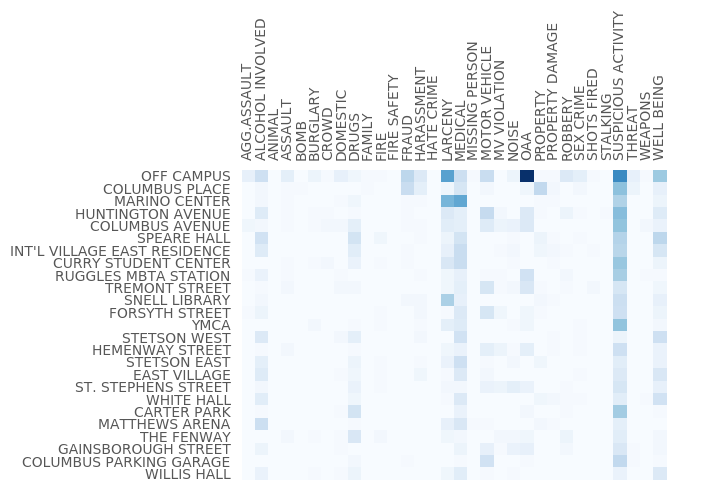

In [209]:
df3 = pd.read_csv("/home/tevin/dev/neu/bostonography/parsedlogfull.csv", sep=";")
splits = df3['INCIDENT'].str.split(' - ')
df3['INCIDENT_MIN'] = splits.str[0]
df3 = pd.crosstab(df3['LOCATION'], df3['INCIDENT_MIN'])

df3['TOTAL_COL'] = df3.sum(axis=1)
df3.sort_values(by='TOTAL_COL', axis=0, inplace=True, ascending=False)
df3 = df3.head(n=25)
df3.drop('TOTAL_COL', axis=1, inplace=True)

fig, ax = plt.subplots()
heatmap = ax.pcolor(df3, cmap=plt.cm.Blues, alpha=5)

fig = plt.gcf()
ax.set_frame_on(False)
ax.set_yticks(np.arange(df3.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(df3.shape[1])+0.5, minor=False)
ax.set_xticklabels(df3.columns, minor=False)
ax.set_yticklabels(df3.index, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

plt.xticks(rotation=90)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False 
for t in ax.yaxis.get_major_ticks(): 
    t.tick1On = False 
    t.tick2On = False  

fig